<a href="https://colab.research.google.com/github/AbhishekSimkar/Ensemble_water_portability/blob/main/EnsembleClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Bagging** ( or Bootstrap Aggregation), is a simple and very powerful ensemble method. Bagging is the application of the Bootstrap procedure to a high-variance machine learning algorithm, typically decision trees.

The idea behind bagging is combining the results of multiple models (for instance, all decision trees) to get a generalized result. Now, bootstrapping comes into picture.

Bagging (or Bootstrap Aggregating) technique uses these subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set.

Bagging works as follows:-

Multiple subsets are created from the original dataset, selecting observations with replacement.

A base model (weak model) is created on each of these subsets.

The models run in parallel and are independent of each other.

The final predictions are determined by combining the predictions from all the models.

**Boosting** is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model.

In this technique, learners are learned sequentially with early learners fitting simple models to the data and then analyzing data for errors. In other words, we fit consecutive trees (random sample) and at every step, the goal is to solve for net error from the prior tree.

When an input is misclassified by a hypothesis, its weight is increased so that next hypothesis is more likely to classify it correctly. By combining the whole set at the end converts weak learners into better performing model.

Let’s understand the way boosting works in the below steps.

A subset is created from the original dataset.

Initially, all data points are given equal weights.

A base model is created on this subset.

This model is used to make predictions on the whole dataset.

In [2]:
df=pd.read_csv('water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
null_cols = ['ph','Sulfate','Trihalomethanes']
for col in null_cols:
    print(col,'\n\nImpotable:\n\n',df[df["Potability"]==0][col].describe(),'\n\nPotable:\n\n',df[df["Potability"]==1][col].describe(),end='\n\n')

ph 

Impotable:

 count    1684.000000
mean        7.085378
std         1.683499
min         0.000000
25%         6.037723
50%         7.035456
75%         8.155510
max        14.000000
Name: ph, dtype: float64 

Potable:

 count    1101.000000
mean        7.073783
std         1.448048
min         0.227499
25%         6.179312
50%         7.036752
75%         7.933068
max        13.175402
Name: ph, dtype: float64

Sulfate 

Impotable:

 count    1510.000000
mean      334.564290
std        36.745549
min       203.444521
25%       311.264006
50%       333.389426
75%       356.853897
max       460.107069
Name: Sulfate, dtype: float64 

Potable:

 count    985.000000
mean     332.566990
std       47.692818
min      129.000000
25%      300.763772
50%      331.838167
75%      365.941346
max      481.030642
Name: Sulfate, dtype: float64

Trihalomethanes 

Impotable:

 count    1891.000000
mean       66.303555
std        16.079320
min         0.738000
25%        55.706530
50%        66.542198


In [7]:
mask1 = df['Potability']==0
mask2 = df['Potability']==1
for col in null_cols:
    if col!='Sulfate':
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df.loc[mask1,col] = df.loc[mask1,col].fillna(df.loc[mask1, col].mean())
        df.loc[mask2,col] = df.loc[mask2,col].fillna(df.loc[mask2, col].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df['ph'] = df['ph'].round().astype(int)
df['Hardness'] = df['Hardness'].round().astype(int)
df['Solids'] = df['Solids'].round().astype(int)
df['Chloramines'] = df['Chloramines'].round().astype(int)
df['Sulfate'] = df['Conductivity'].round().astype(int)
df['Organic_carbon'] = df['Organic_carbon'].round().astype(int)
df['Trihalomethanes'] = df['Trihalomethanes'].round().astype(int)
df['Turbidity'] = df['Turbidity'].round().astype(int)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7,205,20791,7,564,564.308654,10,87,3,0
1,4,129,18630,7,593,592.885359,15,56,5,0
2,8,224,19910,9,419,418.606213,17,66,3,0
3,8,214,22018,8,363,363.266516,18,100,5,0
4,9,181,17979,7,398,398.410813,12,32,4,0


In [9]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,9].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_Test, Y_train, Y_Test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.fit_transform(X_train)
X_Test=scaler.fit_transform(X_Test)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score

In [13]:
models={
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

In [14]:
accuracyMet=[]
bagging_model = BaggingClassifier(n_estimators=10, random_state=42)  # DecisionTree is the default base estimator
bagging_model.fit(X_train, Y_train)
for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(X_train,Y_train)
  y_test_pred = model.predict(X_Test)
  #test-Score-Calculations
  model_accuracy = accuracy_score(Y_Test,y_test_pred)
  accuracyMet.append(model_accuracy)
  model_f1=f1_score(Y_Test,y_test_pred,average='weighted')
  model_precision=precision_score(Y_Test,y_test_pred)
  model_recall=recall_score(Y_Test,y_test_pred)
  print(list(models.keys())[i])
  print("model performance for test set")
  print("accuracy:{:.4f}".format(model_accuracy))
  print('f1 score:{:.4f}'.format(model_f1))
  print('precision: {:.4f}'.format(model_precision))
  print('recall: {:.4f}'.format(model_recall))
  print('='*35)
print('\n')

K-Nearest Neighbors
model performance for test set
accuracy:0.5915
f1 score:0.5810
precision: 0.4394
recall: 0.3566
Decision Tree
model performance for test set
accuracy:0.5564
f1 score:0.5550
precision: 0.4008
recall: 0.3893
Random Forest
model performance for test set
accuracy:0.6326
f1 score:0.6013
precision: 0.5111
recall: 0.2828




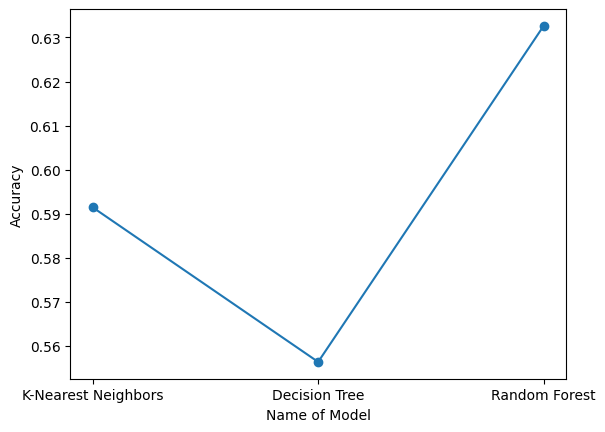

In [15]:
ModelsList=["K-Nearest Neighbors","Decision Tree","Random Forest"]
plt.plot(ModelsList, accuracyMet, marker='o')
plt.xlabel('Name of Model')
plt.ylabel('Accuracy')
plt.show()

In [16]:
from sklearn.naive_bayes import GaussianNB
nn = GaussianNB()
nn.fit(X_train,Y_train)
y_pred = nn.predict(X_Test)
print(accuracy_score(y_pred,Y_Test))

0.6219512195121951


In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_Test)
print(accuracy_score(y_pred,Y_Test))

0.6097560975609756


Using Boosting Technique

In [18]:
# Using Voting Classifier
from sklearn.ensemble import VotingClassifier,GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
# create the sub models
estimators = []
model1 = AdaBoostClassifier()
estimators.append(('AdaBoost', model1))
model2 = GradientBoostingClassifier()
estimators.append(('GradientBoosting', model2))
model3 = RandomForestClassifier()
estimators.append(('RandomForest', model3))
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, Y_train)

# Predict using the ensemble model
y_test_pred = ensemble.predict(X_Test)

# Test-Score-Calculations
model_accuracy = accuracy_score(Y_Test, y_test_pred)
model_f1 = f1_score(Y_Test, y_test_pred, average='weighted')
model_precision = precision_score(Y_Test, y_test_pred)
model_recall = recall_score(Y_Test, y_test_pred)

print("Ensemble model performance for the test set")
print("accuracy: {:.4f}".format(model_accuracy))
print('f1 score: {:.4f}'.format(model_f1))
print('precision: {:.4f}'.format(model_precision))
print('recall: {:.4f}'.format(model_recall))

Ensemble model performance for the test set
accuracy: 0.6204
f1 score: 0.5522
precision: 0.4667
recall: 0.1434
